In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.cluster import KMeans
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
myopia_data = pd.read_csv("Resources/myopia.csv")
myopia_data

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [3]:
myopia_df = myopia_data.drop('MYOPIC', axis=1)
myopia_df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [4]:
myopia_df.dtypes 

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
dtype: object

In [5]:
# Find null values
for column in myopia_df.columns:
    print(f"Column {column} has {myopia_df[column].isnull().sum()} null values")

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values


In [6]:
 # Find duplicate entries
print(f"Duplicate entries: {myopia_df.duplicated().sum()}")

Duplicate entries: 0


In [7]:
# Standarize data with StandarScaler
myopia_df_scaled = StandardScaler().fit_transform(myopia_df)
print(myopia_df_scaled[0])

[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
  4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
  0.98713773  1.0032415 ]


# Part 2: Apply Dimensionality Reduction

In [8]:
# 2.1 Perform dimensionality reduction with PCA. How did the number of the features change?
 # Initialize PCA model preserving 90% of the explained variance in dimensionality reduction
pca = PCA(0.9)

# Get the principal components for the X_train_scaled
myopia_pca = pca.fit_transform(myopia_df_scaled)

myopia_pca_df = pd.DataFrame(myopia_pca)
myopia_pca_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [9]:
# Get the explained variance ratio
pca.explained_variance_ratio_.sum()

0.9187361702915187

In [10]:
# Get the shape of features after reduction
myopia_pca.shape

(618, 10)

In [11]:
##Further reduce the dataset dimensions with t-SNE and visually inspect the results. 
##To do this, run t-SNE on the principal components, which is the output of the PCA transformation.
tsne = TSNE(learning_rate=250)

myopia_tsne = tsne.fit_transform(myopia_pca)

/Users/tamanikaid/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [12]:
##Create a scatter plot of the t-SNE output. Are there distinct clusters?
myopia_tsne.shape

(618, 2)

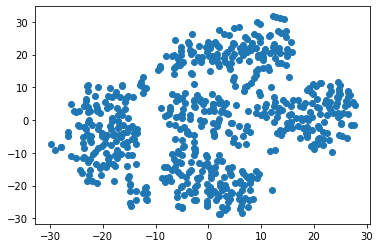

In [13]:
# 2.3 Create a scatter plot of the t-SNE output. Are there distinct clusters?
plt.scatter(myopia_tsne[:,0],myopia_tsne[:,1])

# Part 3: Perform a Cluster Analysis with K-means

In [14]:
##Create an elbow plot to identify the best number of clusters. Make sure to do the following:
##Use a for loop to determine the inertia for each k between 1 through 10.
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


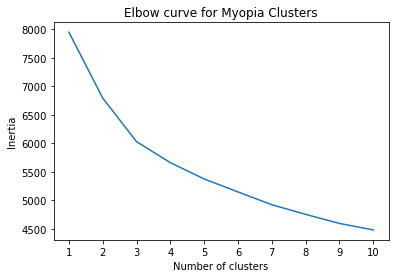

In [15]:
##If possible, determine where the elbow of the plot is, and at which value of k it appears.

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Myopia Clusters')
plt.show()

# Part 4: Make a Recommendation

##From the results above the data can be clustered and will recommended they have 3 clusters. 
##Also looking at the data the results are not very accurate, and more data is required.